In [1]:
source("NeTaGFT.R")

In [2]:
m <- 100

A <- as.matrix(read.table("dataset_virome/A.txt"))
X <- as.matrix(read.table("dataset_virome/X.txt",header = TRUE))
for(i in 1:dim(X)[2]){
  X[,i] <- X[,i] / sqrt(sum(X[,i]**2))
}

#construct graph Laplacian
L <- sym_normalized_graph_laplacian(A)

#perform GFT
tmp <- graph_fourier_transform(L,X,m)
U <- tmp$U
eigenvalues <- tmp$eigenvalues
hF <- tmp$hF
tF <- tmp$tF

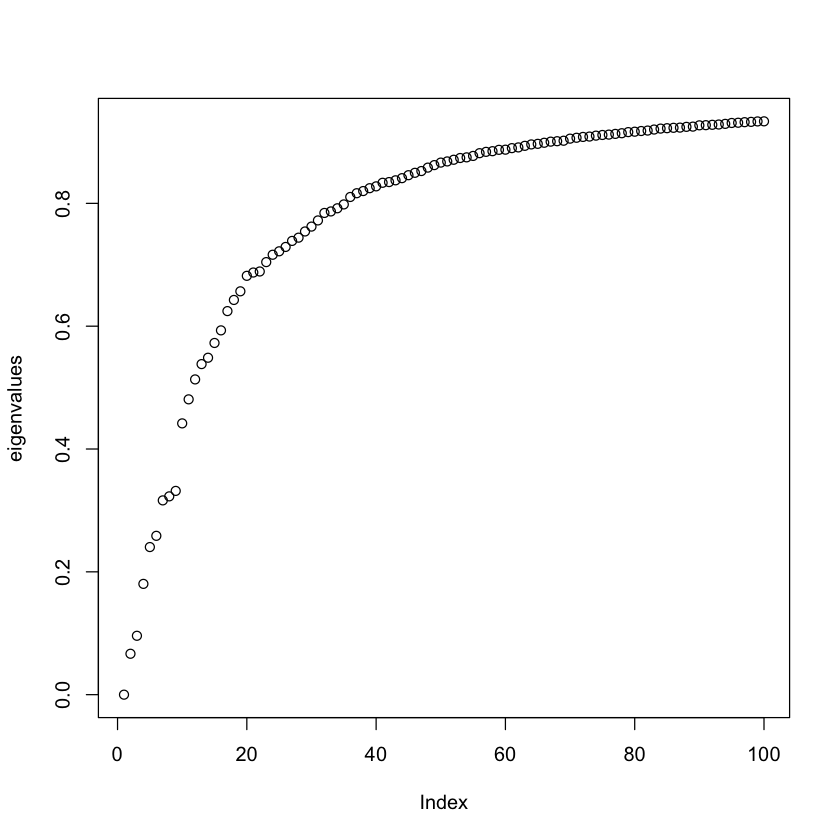

In [3]:
#plot eigenvalues to confirm the value of m is sufficient
plot(eigenvalues)

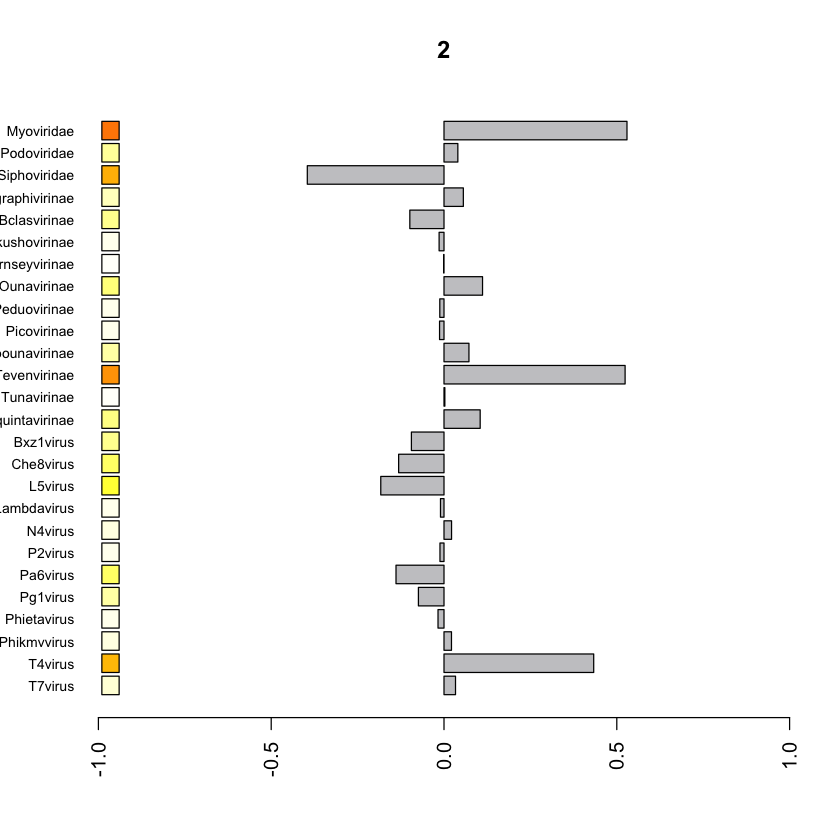

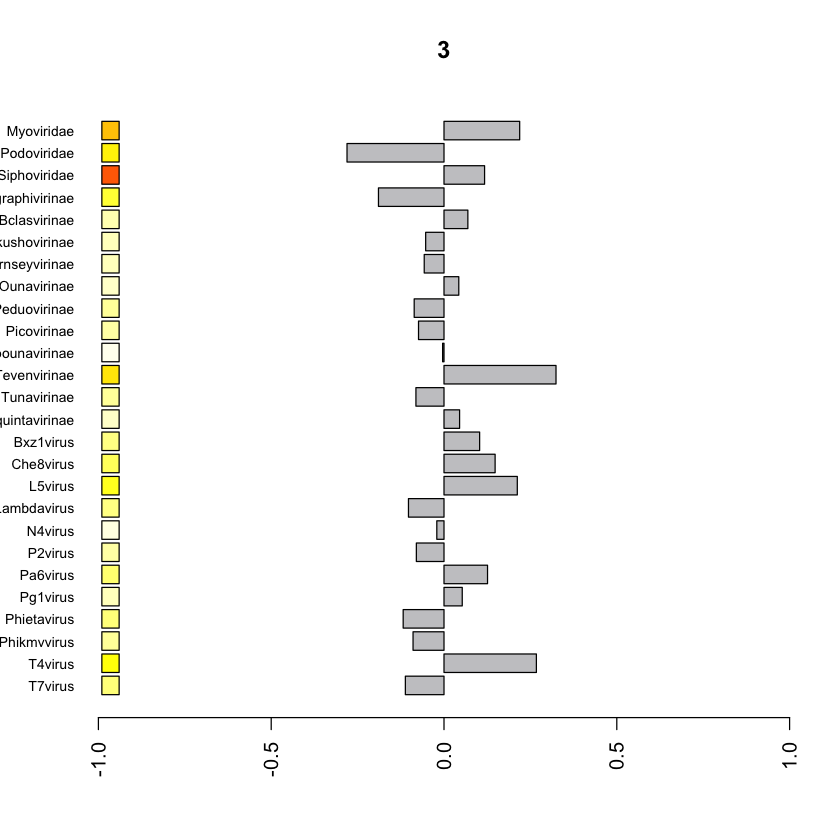

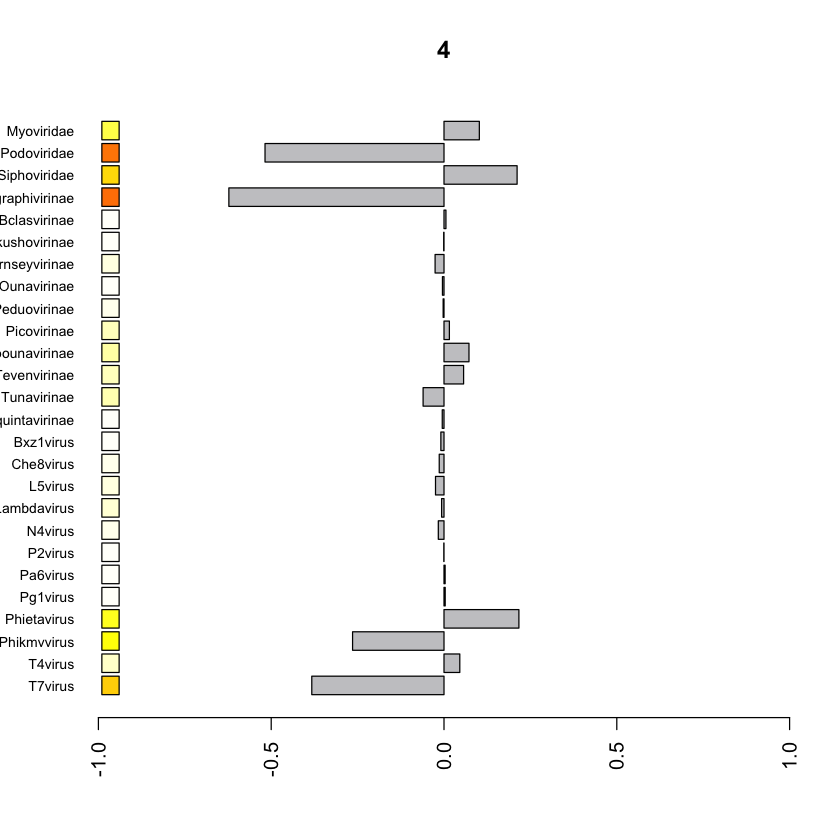

In [4]:
#plot GF coefficients
barplot_gfdomain(hF,tF,2)
barplot_gfdomain(hF,tF,3)
barplot_gfdomain(hF,tF,4)

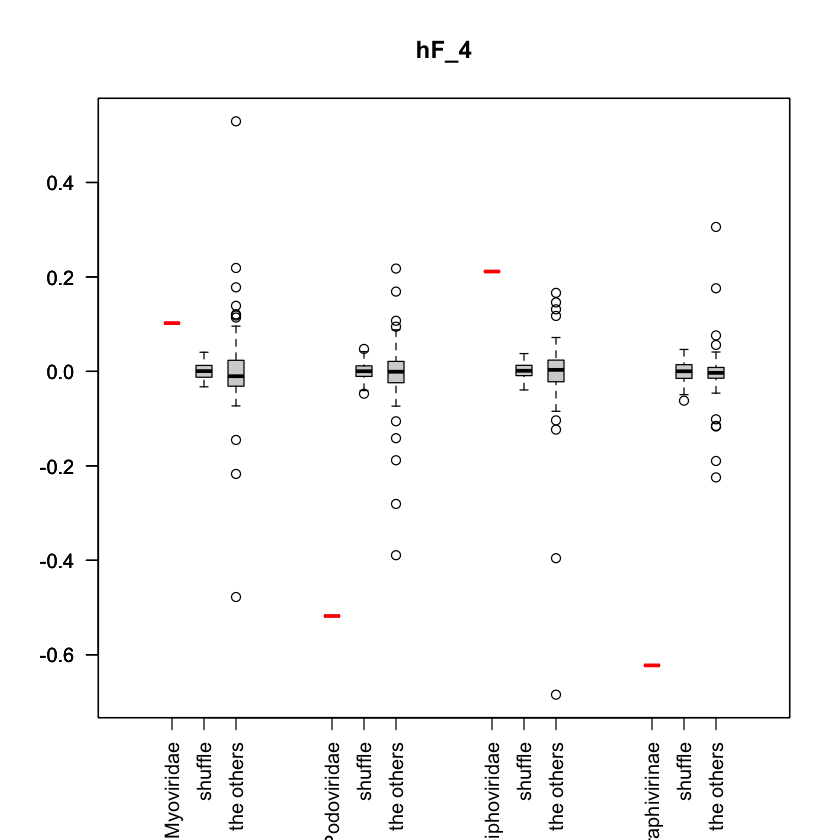

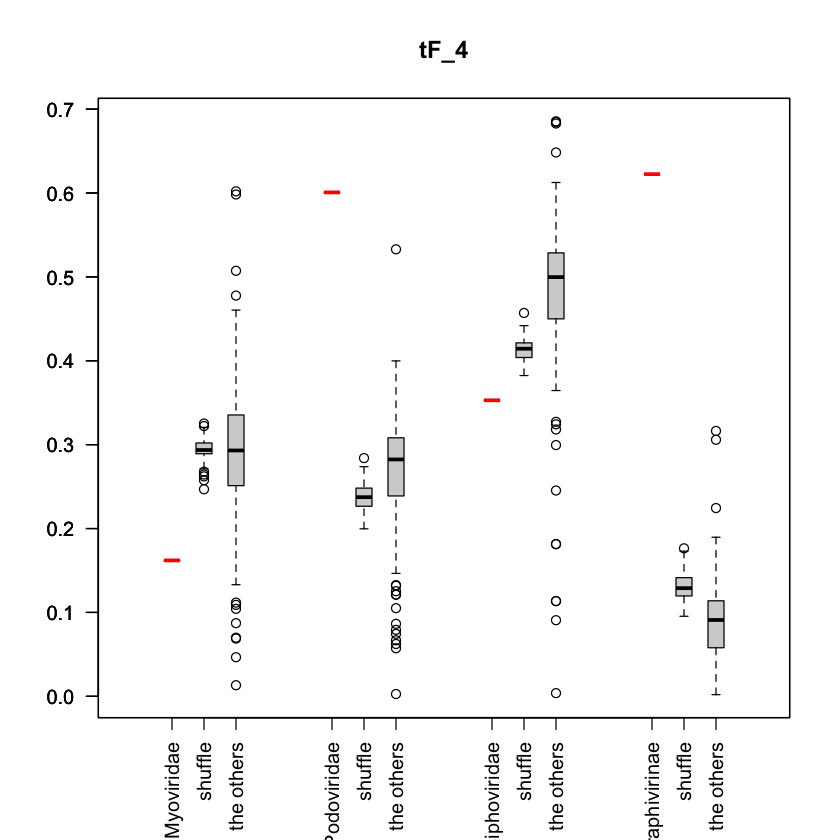

In [5]:
target_trait_idx <- c(1:4)
plot_hF_with_shuffleddata(hF[,target_trait_idx], X[,target_trait_idx], 4)
plot_tF_with_shuffleddata(tF[,target_trait_idx], X[,target_trait_idx], 4)

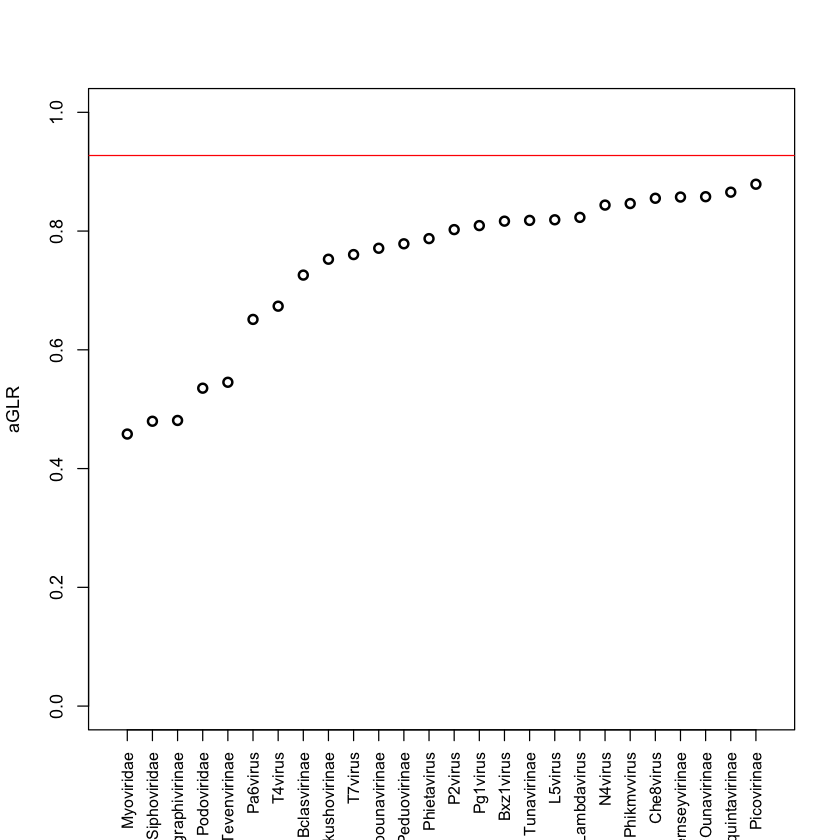

In [6]:
#plot GLR
plot_aGLR(X, U, 100)